In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

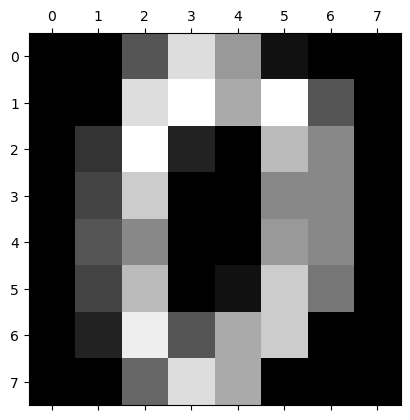

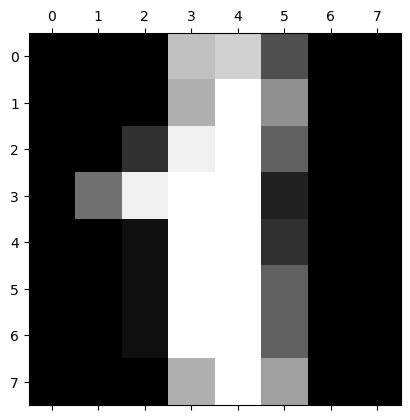

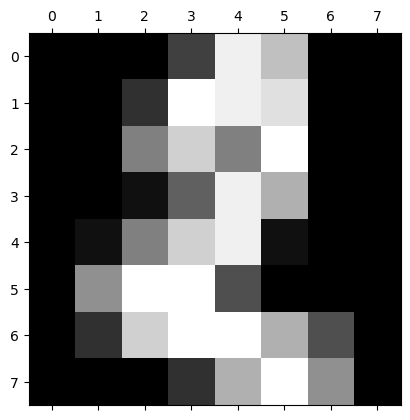

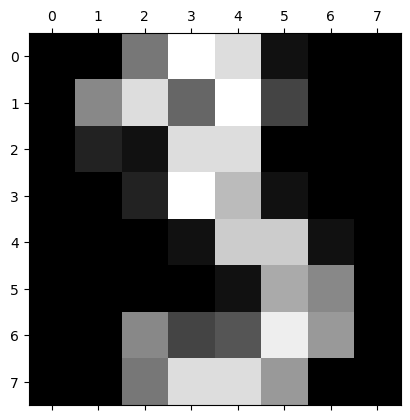

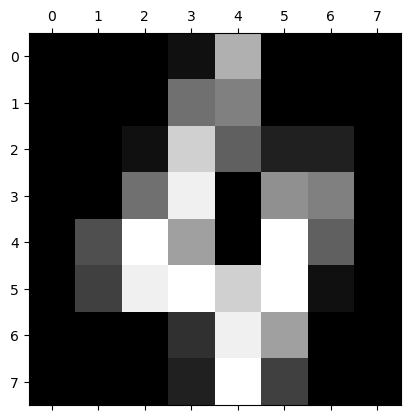

In [21]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [22]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [24]:
digits.images[0:5]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

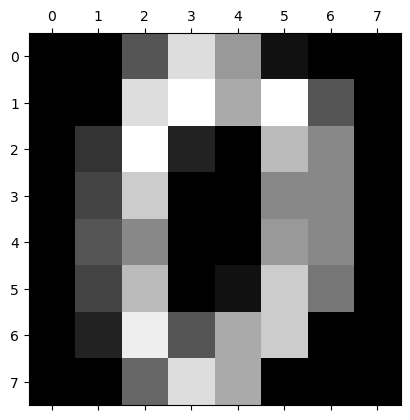

In [26]:
plt.matshow(digits.images[0])

In [28]:
from sklearn.model_selection import train_test_split

# To avoid over-fitting, we split train and test the data-set so that the model is not biased. 
# digits.data is the input and digits.target is the output

In [29]:
X_train, X_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=.1)

# Find out the length of train and test data-set

In [30]:
len(X_train)

1617

In [31]:
len(X_test)

180

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [33]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(X_test,y_test)

0.9611111111111111

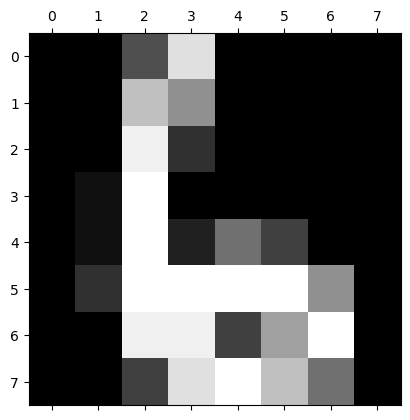

In [41]:
plt.matshow(digits.images[67])

In [42]:
digits.target[67] # it is the y_test

6

In [44]:
model.predict(digits.data[[67]]) # it is the X_test- pass 2D array

array([6])

In [46]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_predicted= model.predict(X_test)

In [49]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 16,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13]])

# Visualize confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

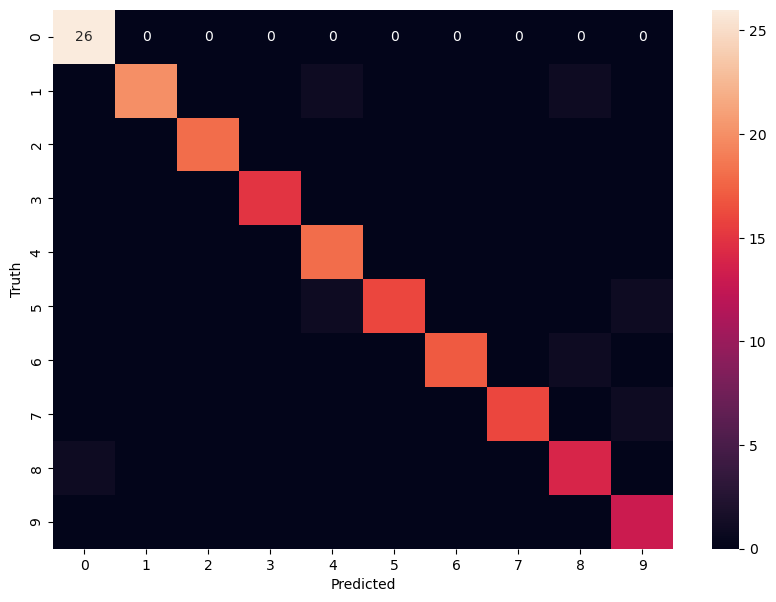

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')